IMPORTING ALL THE REQUIRED MODULES

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os

LOADING IMAGES FROM DRIVE

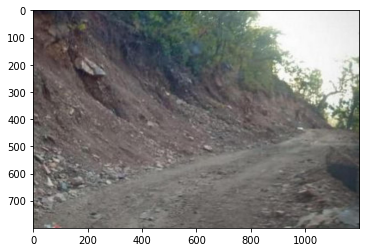

In [ ]:
img=image.load_img("/content/drive/MyDrive/DATASET/Train/Normal/51.jpg")
plt.imshow(img)

READING SHAPE OF IMAGES

In [ ]:
cv2.imread("/content/drive/MyDrive/DATASET/Testing/50.jpg").shape

(800, 1200, 3)

Rescaling the img

In [ ]:
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)


Providing dataset to neural network with specification for trainig

In [ ]:
train_dataset = train.flow_from_directory('/content/drive/MyDrive/DATASET/Train',
target_size = (200, 200),
batch_size = 3, 
class_mode = 'binary')

validation_dataset = train.flow_from_directory('/content/drive/MyDrive/DATASET/Validation',
target_size = (200, 200),
batch_size = 3, 
class_mode = 'binary')

Found 100 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


LABEL GENERATED WITH FUNCTION

In [ ]:
train_dataset.class_indices

{'Normal': 0, 'Pothole': 1}

USING CNN with maximum pooling and applying filters


In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D


In [ ]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3), activation = 'relu', input_shape = (200, 200, 3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(32,(3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(64,(3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    ##
                                    tf.keras.layers.Flatten(),
                                    ##
                                    tf.keras.layers.Dense(512,activation = 'relu'),
                                    ##
                                    tf.keras.layers.Dense(1,activation = 'sigmoid'),
                                    ])

COMPILING THE MODEL

In [ ]:
model.compile(loss = 'binary_crossentropy',
              optimizer = RMSprop(learning_rate=0.001),
              metrics = ['accuracy'])

TRAINING THE MODEL

In [ ]:
model_fit = model.fit(train_dataset,
                      steps_per_epoch = 3,
                      epochs = 33,
                      validation_data = validation_dataset)

Epoch 1/33
3/3 [==============================] - 4s 1s/step - loss: 6.4081 - accuracy: 0.4444 - val_loss: 0.7169 - val_accuracy: 0.4750
Epoch 2/33
3/3 [==============================] - 3s 1s/step - loss: 0.8898 - accuracy: 0.6667 - val_loss: 0.8271 - val_accuracy: 0.5000
Epoch 3/33
3/3 [==============================] - 3s 1s/step - loss: 1.6976 - accuracy: 0.4286 - val_loss: 0.6908 - val_accuracy: 0.5500
Epoch 4/33
3/3 [==============================] - 3s 1s/step - loss: 0.7141 - accuracy: 0.3333 - val_loss: 0.6802 - val_accuracy: 0.7750
Epoch 5/33
3/3 [==============================] - 3s 1s/step - loss: 0.7184 - accuracy: 0.4444 - val_loss: 0.7180 - val_accuracy: 0.5000
Epoch 6/33
3/3 [==============================] - 3s 1s/step - loss: 0.6328 - accuracy: 0.5556 - val_loss: 0.8653 - val_accuracy: 0.5000
Epoch 7/33
3/3 [==============================] - 3s 1s/step - loss: 0.6850 - accuracy: 0.3333 - val_loss: 0.6775 - val_accuracy: 0.5000
Epoch 8/33
3/3 [=========================

TESTING

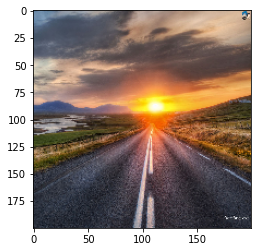

Normal


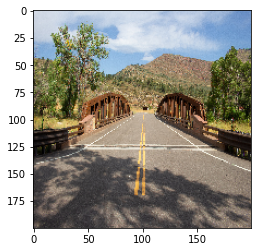

Normal


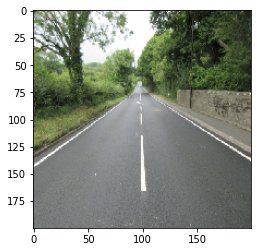

Potholes


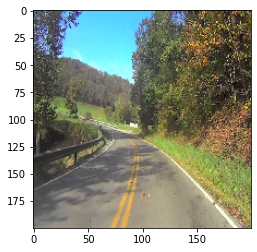

Normal


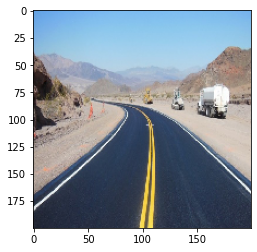

Normal


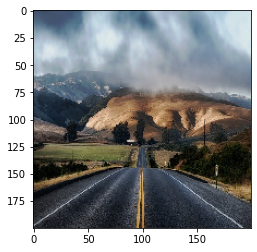

Normal


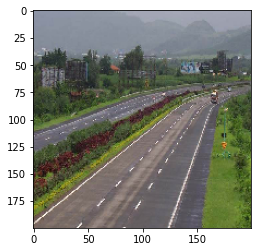

Potholes


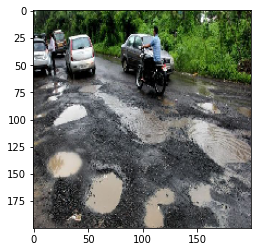

Potholes


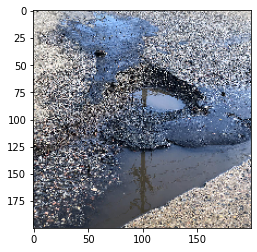

Potholes


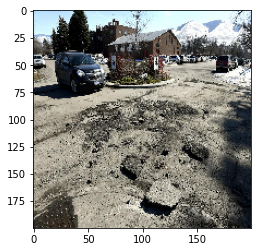

Potholes


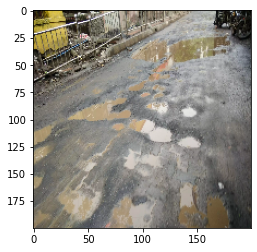

Potholes


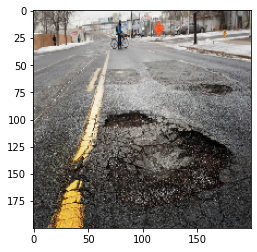

Normal


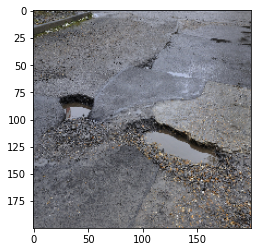

Potholes


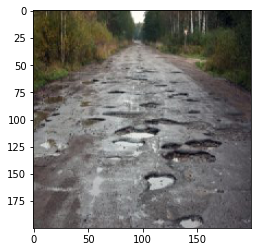

Potholes


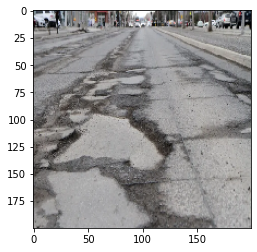

Potholes


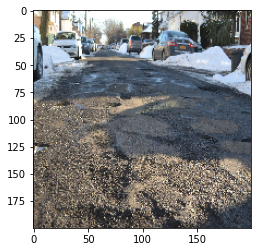

Potholes


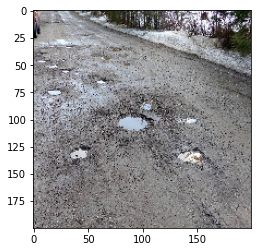

Potholes


In [ ]:
dir_path = '/content/drive/MyDrive/DATASET/Testing'

for i in os.listdir(dir_path ):
  img = image.load_img(dir_path+'//'+ i, target_size=(200,200))
  plt.imshow(img)
  plt. show()

  X = image.img_to_array(img)
  X = np. expand_dims(X,axis =0)
  images = np.vstack([X])
  val = model.predict (images)
  if val == 0:
    print("Normal")
  else:
    print ("Potholes")